<a href="https://colab.research.google.com/github/Sumaiya607/Data-Analysis-projects/blob/main/priject_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
columns_to_drop = ['name', 'email', 'phone-number', 'credit_card']
df = df.drop(columns=columns_to_drop)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [8]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [9]:
for col in df.describe(include = 'object').columns:
  print('COL_NAME')
  print("UNIQUE_VALUES  ->",df[col].unique())
  print('------------------------------------------------------------')

COL_NAME
UNIQUE_VALUES  -> ['Resort Hotel' 'City Hotel']
------------------------------------------------------------
COL_NAME
UNIQUE_VALUES  -> ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
COL_NAME
UNIQUE_VALUES  -> ['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
COL_NAME
UNIQUE_VALUES  -> ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL'

In [17]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [10]:
columns_to_drop=['agent','company']
df = df.drop(columns = columns_to_drop)



In [20]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [23]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


in above we observe that adr have outliers. so we will be working on that


<Axes: >

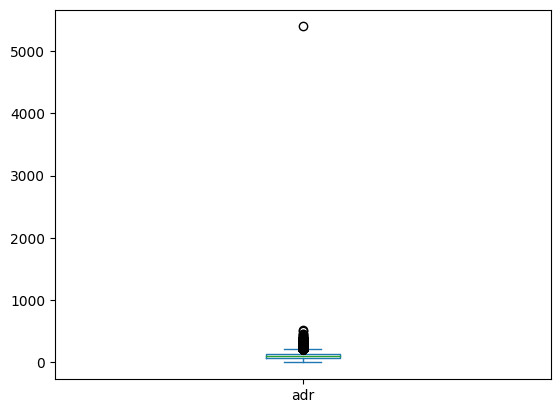

In [24]:
df['adr'].plot(kind='box')

Here we observe that there is only one outlier, all otherss are below 1000.

In [5]:
df = df[df['adr']<5000]

In [26]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


# **Data Analysis and Visualizations**

In [28]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


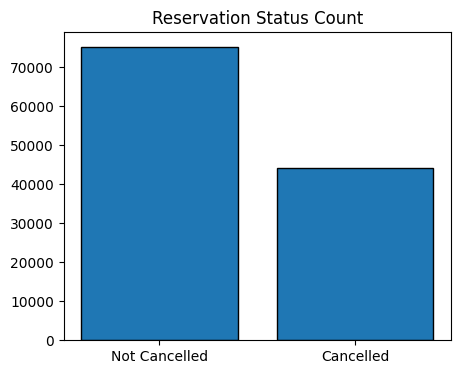

In [29]:
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts(),edgecolor='black')
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

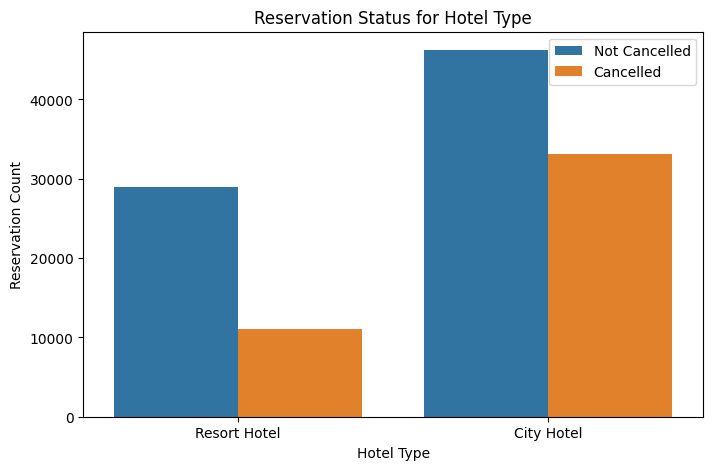

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='hotel',hue='is_canceled',data=df)
legend_labels,_ = plt.gca().get_legend_handles_labels()
plt.title('Reservation Status for Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Reservation Count')
plt.legend(legend_labels,labels=['Not Cancelled','Cancelled'])
plt

Findings:

City Hotels have more bookings and cancelations than resort type, reason may be resort hotels are more expensive.

city hotels needs to be focused more seeing the cancellation ratio, may be in maintanance, facilities,stc

In [30]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.722366
1,0.277634


In [12]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.582738
1,0.417262


In [13]:
resort_hotel = resort_hotel.groupby('reservation_status_date')['adr'].mean()
city_hotel = city_hotel.groupby('reservation_status_date')['adr'].mean()

In [20]:
resort_hotel.index = pd.to_datetime(resort_hotel.index)
city_hotel.index = pd.to_datetime(city_hotel.index)


In [38]:
# Assuming you want to calculate the average 'adr' for City Hotel from the original DataFrame (df)
#print(resort_hotel['adr'].dtype)
#city_hotel = df[df['hotel']=='City Hotel'] # redefine city_hotel from the original DataFrame (df)
#city_hotel_adr_mean = city_hotel.groupby('reservation_status_date')['adr'].mean()

#print(city_hotel_adr_mean.dtype)
#print(city_hotel_adr_mean)

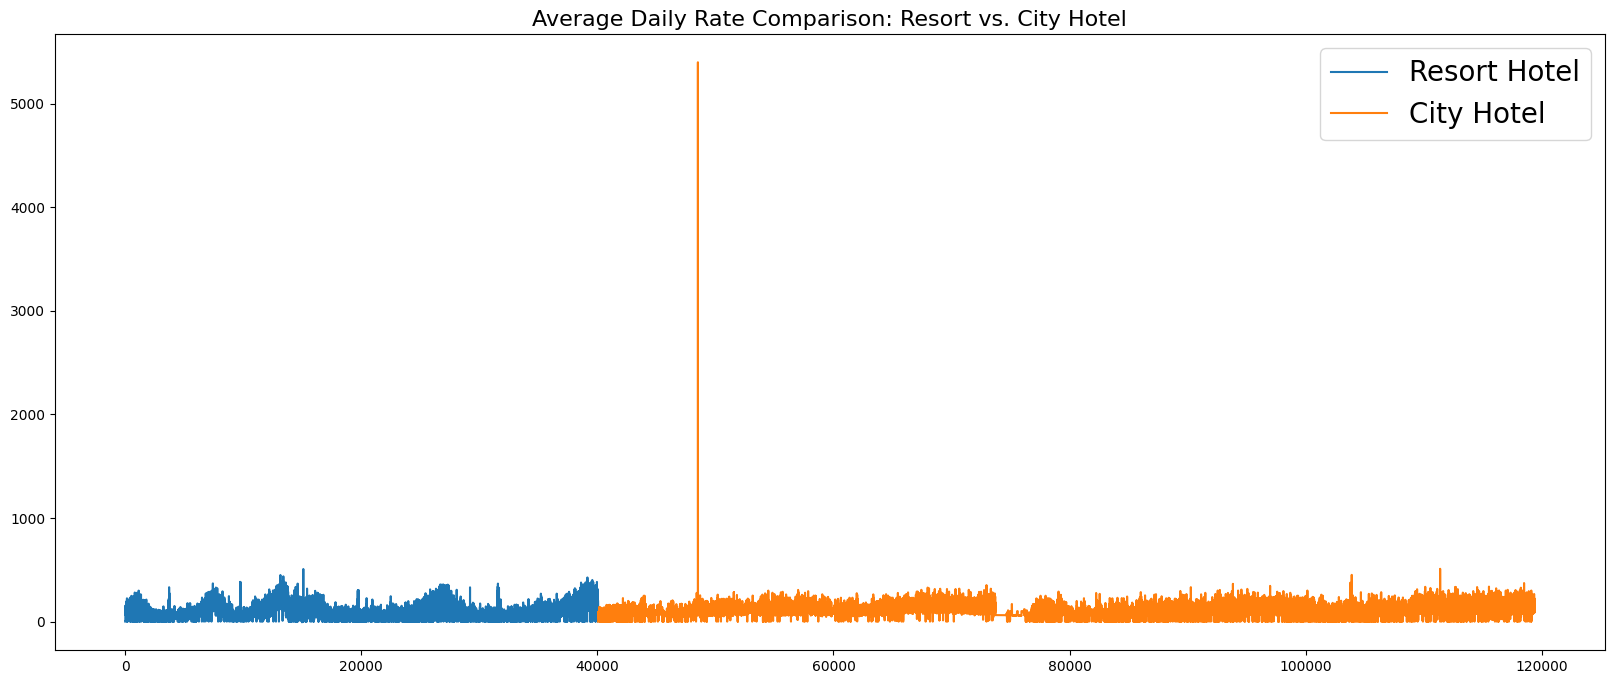

In [47]:
plt.figure(figsize=(20, 8))
plt.title('Average Daily Rate Comparison: Resort vs. City Hotel', fontsize=16)

plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')

plt.legend(fontsize=20)

plt.show()


Findings:

1- City hotel, some spikes may be due to weekends,holidays

2- City hotel price = resort hotel price

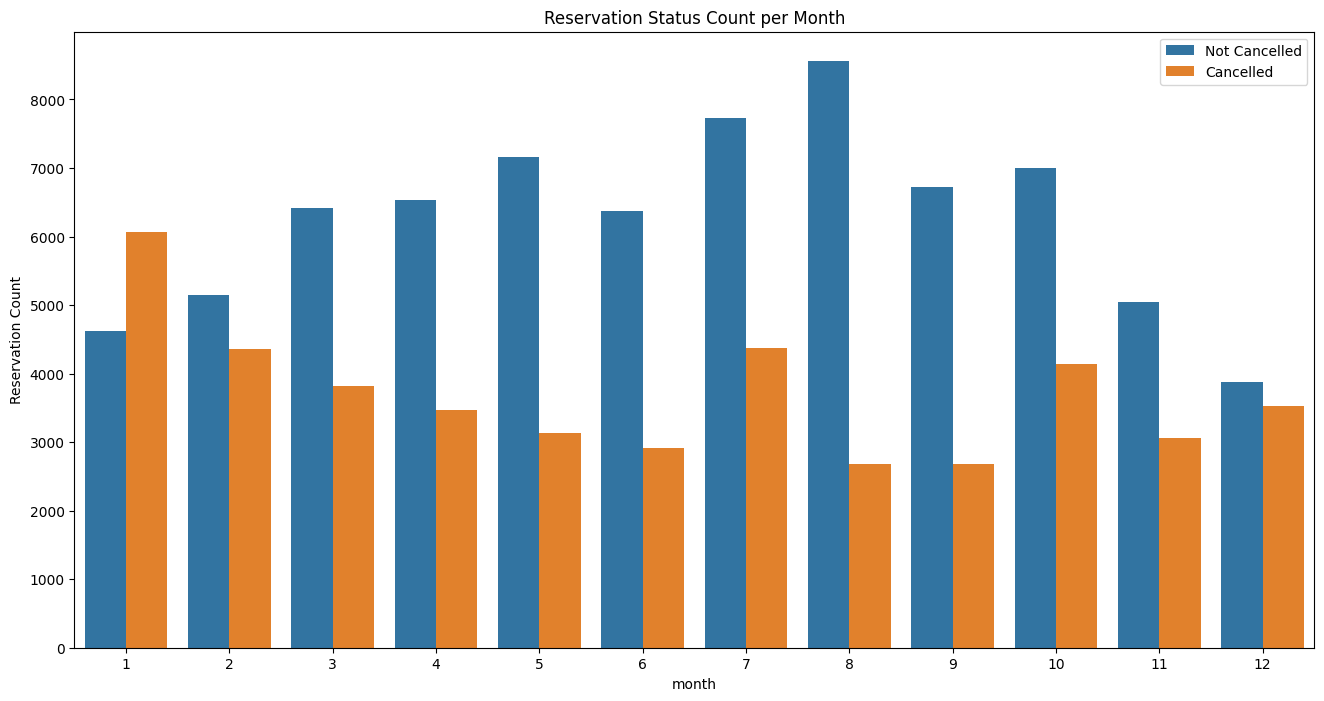

In [11]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
sns.countplot(x='month',hue='is_canceled',data=df)
plt.title('Reservation Status Count per Month')
plt.ylabel('Reservation Count')
plt.legend(['Not Cancelled','Cancelled'])
plt.show()


Findings:

1. Jan has More cancellations
2. largest cancellations in August
3. August has more reservations
4. Dec and Jan has least Reservation

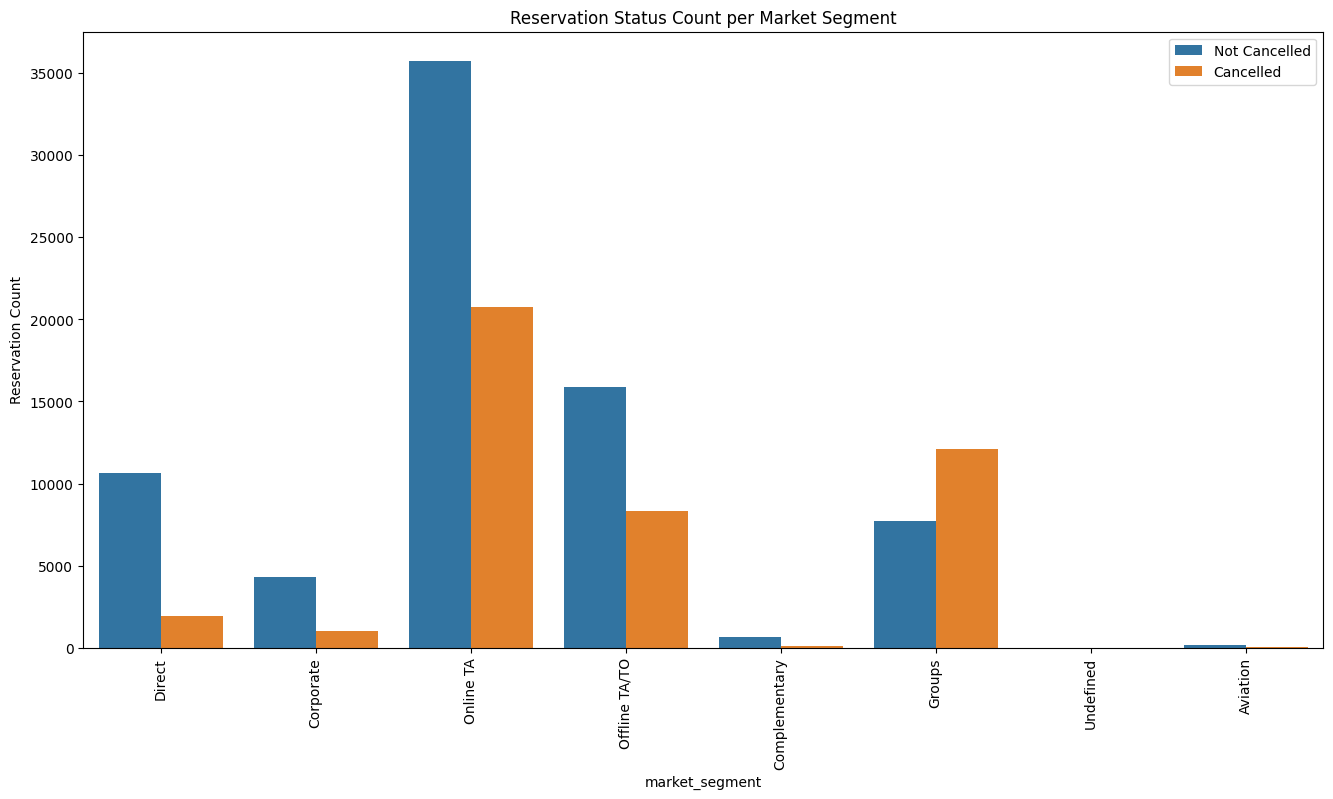

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(x='market_segment',hue='is_canceled',data=df)
plt.title('Reservation Status Count per Market Segment')
plt.ylabel('Reservation Count')
plt.legend(['Not Cancelled','Cancelled'])
plt.xticks(rotation=90)
plt.show()

**Cancellation rates:** About 27% of reservations were canceled. City hotels have a higher cancellation rate (30%) than resort hotels (23%).

**Average daily rate (ADR):** City hotels and resort hotels have similar ADRs overall. However, city hotel ADRs fluctuate more, with spikes likely due to weekends and holidays.

**Monthly cancellations:** August has the highest number of cancellations and reservations. December and January have the fewest reservations.

**Market segment cancellations:** The "Groups" market segment has a high number of reservations and cancellations. The "Aviation" market segment has a low number of reservations and cancellations.

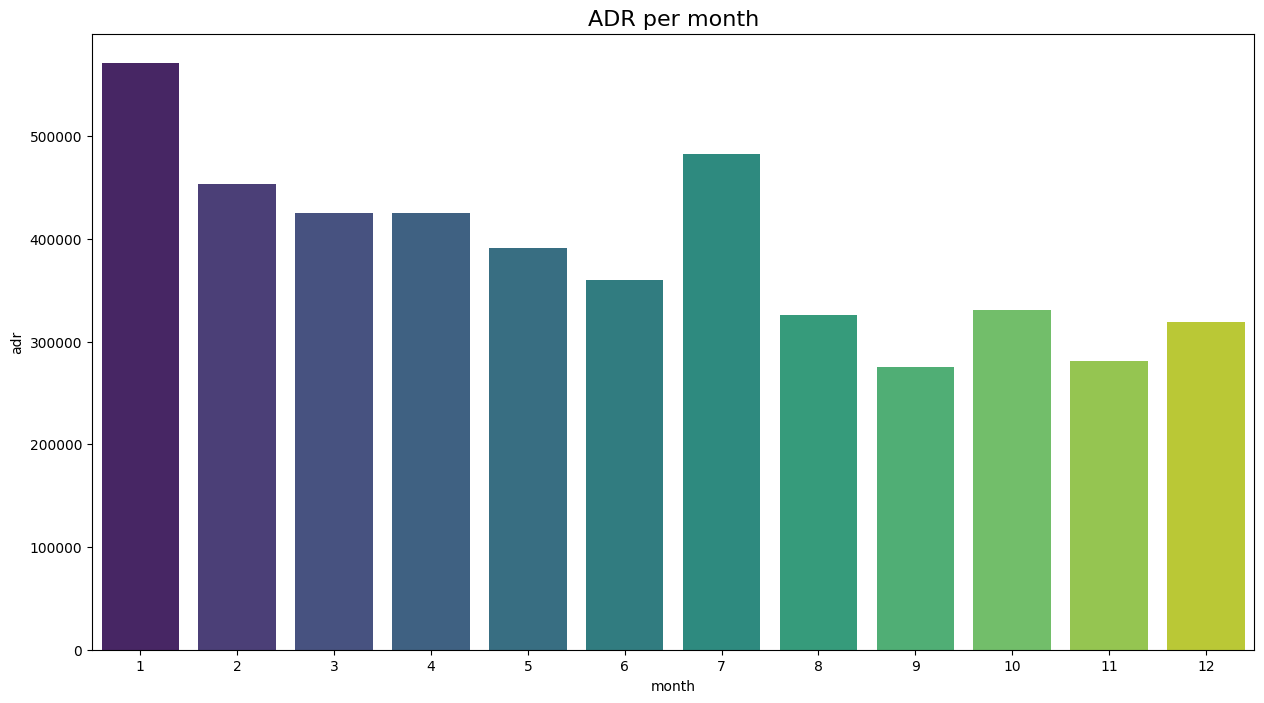

In [16]:
plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=16)

df_filtered = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()
sns.barplot(x='month', y='adr', data=df_filtered,palette='viridis')
plt.show()

The bar chart visualizes the sum of the Average Daily Rate (ADR) for canceled bookings per month.

ADR in aug is lowest

July has the highest ADR sum, indicating higher revenue loss due to cancellations in this month. This could be due to peak season or special events

In [18]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]

In [19]:
top_10_country

,count
country,
PRT,27519
GBR,2453
ESP,2177
FRA,1934
ITA,1333
DEU,1218
IRL,832
BRA,830
USA,501


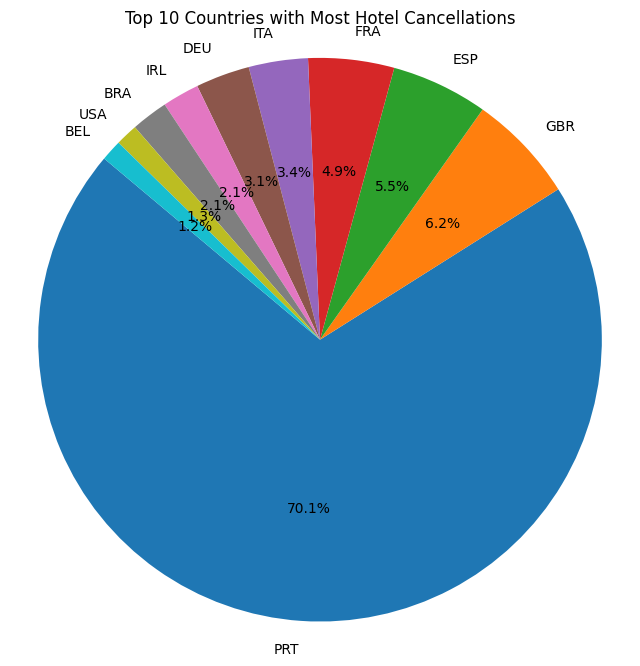

In [22]:
plt.figure(figsize=(8, 8))
plt.title('Top 10 Countries with Most Hotel Cancellations')
plt.pie(top_10_country, labels=top_10_country.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

Findings:

In Portugul, increase the facilities and decrease the prices, give discounts, advertisements,marketing etc

## Now lets assume that the most of the customers are coming through offline agents?

In [23]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


In [25]:
df['market_segment'].value_counts(normalize='true')

,proportion
market_segment,
Online TA,0.473046
Offline TA/TO,0.202856
Groups,0.165935
Direct,0.105587
Corporate,0.044350
Complementary,0.006223
Aviation,0.001985
Undefined,0.000017


so are hypothese is wrong as online TA have highest no.

Since 40% of customers book through online agents, cancellations may occur if the actual experience doesn't match the attractive online images. To avoid this, it’s important to present an accurate representation of the property, including its facilities, ensuring that customers know exactly what to expect before booking

now lets check the price of cancelled bookings,are they high?

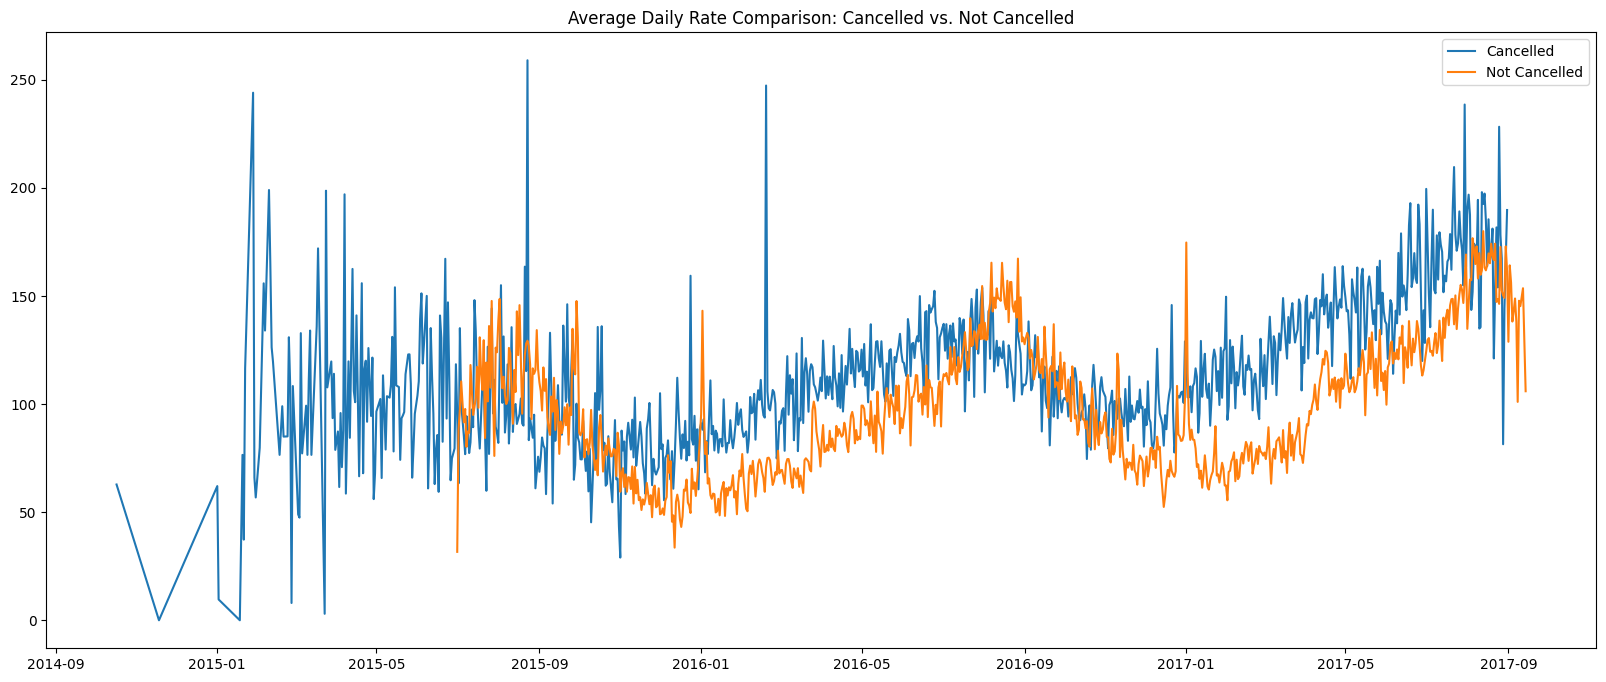

In [27]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')['adr'].mean()

cancelled_df_adr = cancelled_df_adr.reset_index()
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_df_adr = df[df['is_canceled']==0].groupby('reservation_status_date')['adr'].mean()

not_cancelled_df_adr = not_cancelled_df_adr.reset_index()
not_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,8))
plt.title('Average Daily Rate Comparison: Cancelled vs. Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='Cancelled')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='Not Cancelled')
plt.legend()

There is no significant difference in the ADR trend between canceled and not-canceled bookings. This suggests that price might not be a major factor influencing cancellations.

so lets take the data of 2016 and 2017 till sept

In [30]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2016') & (cancelled_df_adr['reservation_status_date'] <= '2017')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] > '2016') & (not_cancelled_df_adr['reservation_status_date'] <= '2017')]

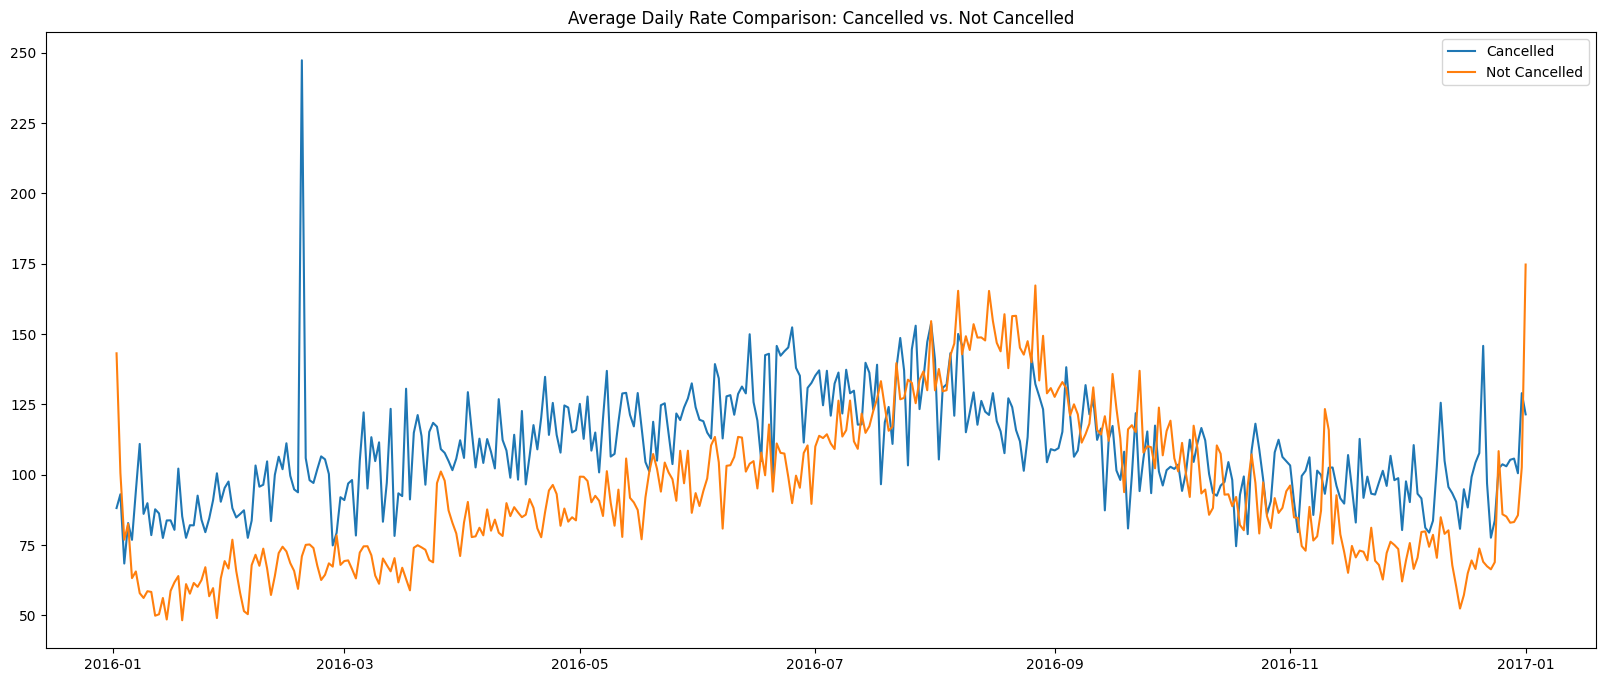

In [31]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate Comparison: Cancelled vs. Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='Cancelled')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='Not Cancelled')
plt.legend()
plt.show()

We see that cancelled (blue) is more than the cancelled one
It process that price have effect on cancellation.

## Therefore,ADR is the most influencing factor on the cancellation rate